# Project Title - Indian Food Analysis


In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/nehaprabhavalkar/indian-food-101/download' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: 
Your Kaggle username: 

The dataset has been downloaded and extracted.

In [2]:
data_dir = './indian-food-101'

In [3]:
import os
os.listdir(data_dir)

['indian_food.csv']

Let us save and upload our work to Jovian before continuing.

In [4]:
project_name = "indian-food-analysis" 

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

In [7]:
import pandas as pd
import numpy as np

In [8]:
df_food= pd.read_csv('indian-food-101/indian_food.csv')
df_food

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [9]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [10]:
df_food.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [11]:
df_food.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [12]:
df_food.shape

(255, 9)

In [ ]:
df_food=df_food[(df_food.flavor_profile!="-1")]
df_food=df_food[(df_food.prep_time>0)]
df_food=df_food[(df_food.cook_time>0)]
df_food=df_food[(df_food.state!="-1")]
df_food

In [ ]:
import jovian

In [ ]:
jovian.commit()

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [13]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

C:\Users\naren\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

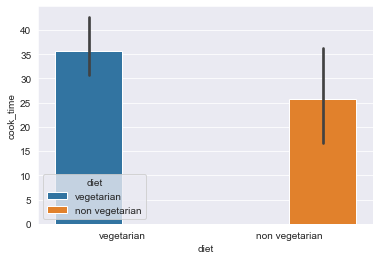

In [14]:
sns.barplot(df_food.diet,df_food.cook_time,hue=df_food.diet)

On average it takes more time to cook Non-Vegetarian dishes than Vegetarian Indian dishes

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [15]:
x=df_food.groupby('flavor_profile').count()['name']
x=np.array(x)
y=df_food.flavor_profile.unique()
y.sort()

Text(0.5, 0, 'No. of Dishes')

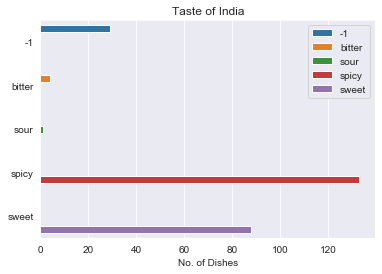

In [16]:
sns.barplot(x,y,hue=y)
plt.title("Taste of India")
plt.xlabel("No. of Dishes")

Indian food mainly consist of Sweet and Spicy dishes.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

Text(0.5, 1.0, 'StateWise distribution')

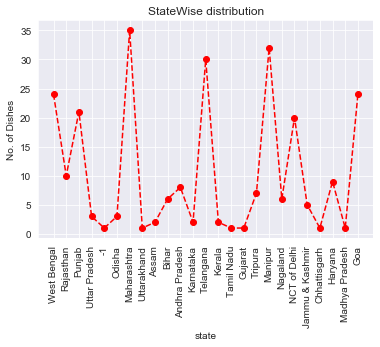

In [17]:
plt.plot(df_food.state.unique(),np.array(df_food.groupby('state').count()['name']),"o--r")
plt.xticks(rotation="vertical")
plt.xlabel("state")
plt.ylabel("No. of Dishes")
plt.title("StateWise distribution")

Nagaland and Maharashtra contribute to the most number of dishes in our dataset.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

([<matplotlib.patches.Wedge at 0x2059fd61e10>,
 [Text(0.5499999702695115, 0.9526279613277875, 'dessert'),
  Text(-0.9423017977185376, -0.5675097549966983, 'main course'),
  Text(0.9492220472937892, -0.5558574501896935, 'snack'),
  Text(1.0996661049069008, -0.02710088040793507, 'starter')])

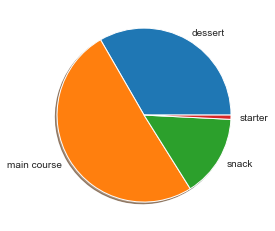

In [18]:
x=np.array(df_food.groupby('course').count()['name'])
y=df_food.course.unique()
y.sort()
plt.pie(x,labels=y,shadow=True)

In India ,Desserts are a main part of people's diet , this can also be the reason why there are main people who suffer from sugar and diabetes.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

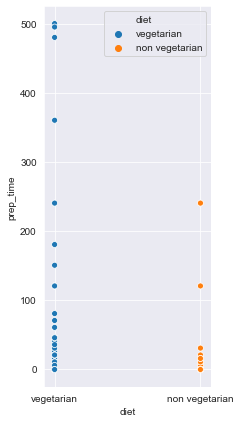

In [19]:
matplotlib.rcParams['figure.figsize'] = (3, 7)
sns.scatterplot(df_food.diet,df_food.prep_time,hue=df_food.diet)

Here,the number of vegetarian and non-vegetarian dishes are not equal but Non-Vegetarian dishes take more time to prepare the ingredient before the cooking even starts.

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

#### Q1: What are the Top 5 dishes that take the most time to cook.

In [20]:
df=df_food.sort_values(by="cook_time",ascending=False)

In [21]:
df.head(5)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
62,Shrikhand,"Curd, sugar, saffron, cardamom",vegetarian,10,720,sweet,dessert,Maharashtra,West
27,Malapua,"Yoghurt, refined flour, ghee, fennel seeds",vegetarian,10,120,sweet,dessert,Bihar,North
75,Biryani,"Chicken thighs, basmati rice, star anise, swee...",non vegetarian,30,120,spicy,main course,Telangana,South
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500,120,spicy,main course,Punjab,North
34,Rasgulla,"Chhena, sugar, cardamom",vegetarian,10,90,sweet,dessert,West Bengal,East


In [22]:
df['name'].head(5)

62       Shrikhand
27         Malapua
75         Biryani
114    Pindi chana
34        Rasgulla
Name: name, dtype: object

Here we see that delicious sweets take more the to cook.

#### Q2: What are the Top 5 dishes that take the most time to prepare and cook.

In [23]:
df=pd.DataFrame()
df['name']=df_food.name
df['cook time + prep time']=df_food.prep_time + df_food.cook_time
df['flavor profile']=df_food.flavor_profile
df=df.sort_values(by='cook time + prep time',ascending=False)

In [24]:
df.head(5)

,name,cook time + prep time,flavor profile
62,Shrikhand,730,sweet
114,Pindi chana,620,spicy
155,Puttu,535,-1
29,Misti doi,510,sweet
128,Dosa,450,spicy


Here also we see that sweets take the most time to prepare and cook

#### Q3: What is the list of ingredients used and what the count of the number of ingredients

In [25]:
ing=pd.DataFrame()
ing=df_food['ingredients']
ing_new=pd.DataFrame()
ing_new['ings']=['']
for i in ing:
    ing_new['ings']+=i
ingredients=ing_new['ings']
ingredients=ingredients.unique()
ingredients=ingredients[0].split(",")
ingredients

['Maida flour',
 ' yogurt',
 ' oil',
 ' sugarGram flour',
 ' ghee',
 ' sugarCarrots',
 ' milk',
 ' sugar',
 ' ghee',
 ' cashews',
 ' raisinsFlour',
 ' ghee',
 ' kewra',
 ' milk',
 ' clarified butter',
 ' sugar',
 ' almonds',
 ' pistachio',
 ' saffron',
 ' green cardamomMilk powder',
 ' plain flour',
 ' baking powder',
 ' ghee',
 ' milk',
 ' sugar',
 ' water',
 ' rose waterSugar syrup',
 ' lentil flourMaida',
 ' corn flour',
 ' baking soda',
 ' vinegar',
 ' curd',
 ' water',
 ' turmeric',
 ' saffron',
 ' cardamomCashews',
 ' ghee',
 ' cardamom',
 ' sugarMilk',
 ' cottage cheese',
 ' sugarMilk',
 ' rice',
 ' sugar',
 ' dried fruitsGram flour',
 ' ghee',
 ' sugarYogurt',
 ' milk',
 ' nuts',
 ' sugarRefined flour',
 ' besan',
 ' ghee',
 ' powdered sugar',
 ' yoghurt',
 ' green cardamomFirm white pumpkin',
 ' sugar',
 ' kitchen lime',
 ' alum powderRice',
 ' sugar',
 ' nutsCondensed milk',
 ' sugar',
 ' spices',
 ' nutsSemolina',
 ' ghee',
 ' nuts',
 ' milkKhoa',
 ' coconut',
 ' molu leafCo

In [26]:
len(ingredients)

882

Indian cuisine has various ingredients and is known for the variety of Spices

#### Q4: Show the list of Non-vegetarian dishes and the ratio of veg and non-veg dishes to the total no. of dishes

In [27]:
df_diet=pd.DataFrame()
df_diet=df_food[['name','diet']]
print((df_diet[(df_diet.diet=="non vegetarian")])['name'])
len(df_diet[(df_diet.diet=="non vegetarian")])

64               Maach Jhol
65              Pork Bharta
67                    Galho
75                  Biryani
76           Butter chicken
79           Chicken razala
80     Chicken Tikka masala
81            Chicken Tikka
122        Tandoori Chicken
123     Tandoori Fish Tikka
137                Beef Fry
163         Chicken Varuval
167             Kolim Jawla
172              Bombil fry
211                Vindaloo
223             Kumol Sawul
225              Alu Pitika
226             Masor tenga
228             Bilahi Maas
229              Black rice
232     Chingri malai curry
235                Haq Maas
236           Chingri Bhape
237                Kabiraji
239          Koldil Chicken
240               Konir Dom
241             Koldil Duck
242              Masor Koni
247       Prawn malai curry
Name: name, dtype: object


29

In our dataset we have a very little number of non vegetarian dishes , we can say that this dataset is little biased to only vegetarian dishes

#### Q5: Find out the Dishes from each region and plot a pie chart to analysis the Data.

region
-1            13
Central        3
East          31
North         49
North East    25
South         59
West          74
Name: diet, dtype: int64


([<matplotlib.patches.Wedge at 0x2059fea0cc0>,
 [Text(1.0858111935590689, 0.1761080689287984, '-1'),
  Text(1.0299948770443517, 0.3861483565449824, 'Central'),
  Text(0.7826127515371225, 0.7729924198409026, 'East'),
  Text(-0.21626709640952127, 1.0785307334566758, 'North'),
  Text(-0.9868106109945944, 0.48600907196108545, 'North East'),
  Text(-0.9193134131291331, -0.6040387805769295, 'South'),
  Text(0.6705366842883872, -0.8719980246672213, 'West')])

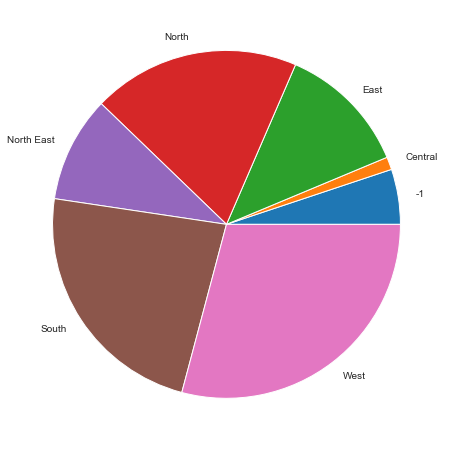

In [28]:
matplotlib.rcParams['figure.figsize'] = (15, 8)
n=df_food.groupby(df_food.region)['diet'].count()
print(n)
plt.pie(np.array(n),labels=n.index)

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Inferences and Conclusion

From the above analysis we can learn many things about Indian food.
Sweets are a major part of Indian diet.
Many Non-Vegetarian Dishes are not included in the dataset which makes it hard to analysis.
Indian food is made up of a variety of spieces which are not found in many countries.
Some Indian dishes take a lot of preparation before they are even cooked.
Over different regions we find various types of food.


Seaborn, Mathplotlib , Numpy , Pandas are very useful to analysis data
Jovian.ml has made very informative video that are very useful

In [ ]:
import jovian

In [ ]:
jovian.commit()

## References and Future Work

In the future we can add more Non-Vegetarian dishes and add more information about ingredients.
we can also add the calories in each dish and make analysis on that data.

In [29]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
